In [2]:
import datajoint as dj

In [3]:
schema = dj.schema('cinni_university')

Connecting cinni@db.data-science-ust.net:3306


In [6]:
# schema.drop()  # drop the previous definition -- to start from scratch
# schema = dj.schema('dimitri_university')  # create again

In [10]:
# This restores classses for tables defined previously 
# schema.spawn_missing_classes()  

In [4]:
@schema
class Student(dj.Manual):
    definition = """
    student_id : int unsigned   # university-wide ID number
    ---
    first_name      : varchar(40)
    last_name       : varchar(40)
    sex             : enum('F', 'M', 'U')
    date_of_birth   : date
    home_address    : varchar(120) # mailing street address
    home_city       : varchar(60)  # mailing address
    home_state      : char(2)      # US state acronym: e.g. OH
    home_zip        : char(10)     # zipcode e.g. 93979-4979
    home_phone      : varchar(20)  # e.g. 414.657.6883x0881
    """

In [6]:
@schema
class Department(dj.Manual):
    definition = """
    dept : varchar(6)   # abbreviated department name, e.g. BIOL
    ---
    dept_name    : varchar(200)  # full department name
    dept_address : varchar(200)  # mailing address
    dept_phone   : varchar(20)
    """

@schema
class StudentMajor(dj.Manual):
    definition = """
    -> Student
    ---
    -> Department
    declare_date :  date  # when student declared her major
    """

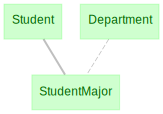

In [9]:
dj.Diagram(schema)

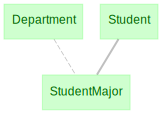

In [15]:
dj.Diagram(schema)

In [10]:
@schema
class Course(dj.Manual):
    definition = """
    -> Department
    course  : int unsigned   # course number, e.g. 1010
    ---
    course_name :  varchar(200)  # e.g. "Neurobiology of Sensation and Movement."
    credits     :  decimal(3,1)  # number of credits earned by completing the course
    """
    
@schema
class Term(dj.Manual):
    definition = """
    term_year : year
    term      : enum('Spring', 'Summer', 'Fall')
    """

@schema
class Section(dj.Manual):
    definition = """
    -> Course
    -> Term
    section : char(1)
    ---
    auditorium   :  varchar(12)
    """
    
@schema
class CurrentTerm(dj.Manual):
    definition = """
    -> Term
    """

@schema
class Enroll(dj.Manual):
    definition = """
    -> Student
    -> Section
    """

@schema
class LetterGrade(dj.Manual):
    definition = """
    grade : char(2)
    ---
    points : decimal(3,2)
    """

@schema
class Grade(dj.Manual):
    definition = """
    -> Enroll
    ---
    -> LetterGrade
    """

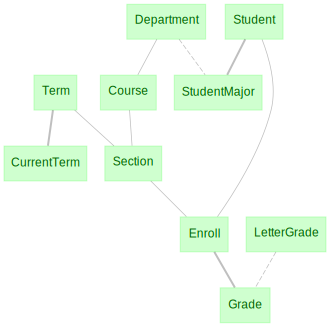

In [11]:
dj.Diagram(schema)

In [26]:
Term().insert1(('2020', 'Spring'))

In [29]:
Term()

term_year,term
2020,Spring


In [27]:
CurrentTerm.insert1(('2020', 'Spring'))

In [28]:
CurrentTerm()

term_year,term
2020,Spring


In [12]:
Student()

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881


In [18]:
Student.insert([    
    (2,'Liana','Patel','F','1988-11-19','','Richmond','TX','77407','281-383-9400'),
    (3,'Ira','Patel','F','1988-11-19','','Richmond','TX','77407','281-383-9400'),
    (4,'Anaya','T','F','2000-11-19','','Richmond','TX','77407','281-383-9400'),
    (5,'Shlok','Gupta','F','2001-01-19','','Richmond','TX','77407','281-383-9400')
])

In [19]:
Student()

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1,Cinni,Patel,F,1984-07-16,,Richmond,TX,77407,281-383-9400
2,Liana,Patel,F,1988-11-19,,Richmond,TX,77407,281-383-9400
3,Ira,Patel,F,1988-11-19,,Richmond,TX,77407,281-383-9400
4,Anaya,T,F,2000-11-19,,Richmond,TX,77407,281-383-9400
5,Shlok,Gupta,F,2001-01-19,,Richmond,TX,77407,281-383-9400


In [20]:
Term()

term_year,term


In [22]:
Term.insert1(('2020','Spring'))

In [23]:
CurrentTerm()

term_year,term


In [ ]:
CurrentTerm.insert1()